batch gradient descent is not suitable for large amount of data and might be leading for stuck in local minimum, stockstic gradient descent is fast but more vunerable for anomalies in data.

batch gradient descent vs stockstic gradient descent : in bgd weights and biasis are adjusted after each training sample. but this could implify the cost.

### in our problem will use mini batch gradient descent: shuffle the data then devide it into small batches. (the images are 28*28 px)

In [37]:
import random

def get_training_samples(batch_size):
    # here we have 20000 samples so we devide it in batches to persui the mini batch gd technique
    with open("train.csv") as file: 
        text = file.read()
    textlines = text.strip().split("\n") 
    #strip() docs: Return a copy of the string with the leading and trailing characters removed.
    random.shuffle(textlines)
    start = 0
    while start < len(textlines):
        labels = []
        targets = []
        inputs = []
        end = start + batch_size
        for textline in textlines[start:end]:
            cells = textline.split(",")
            labels.append(int(cells[0]))
            targets.append([float(c) for c in cells[1:11]]) # 10 onehot encoding represent the label
            inputs.append([float(c) for c in cells[11:]])
        yield labels, targets, inputs
        start += batch_size

def get_test_samples():
    with open("test.csv", "r") as file:
        text = file.read()
    textlines = text.strip().split("\n")
    labels = []
    targets = []
    inputs = []
    for textline in textlines:
        cells = textline.split(",")
        value = int(cells[0])
        labels.append(int(cells[0]))
        targets.append([float(c) for c in cells[1:11]])
        inputs.append([float(c) for c in cells[11:]])
    return labels, targets, inputs

def plot_number(inputs):
    line = ""
    for p in inputs:
        print()
        line += ".░▒▓█"[round(p * 4)]
#         line += ".🤍🤎💖"[round(p * 3)]
        if len(line) > 27:
            print(line)
            line = ""

In [46]:
#train data
epochs = 1
batch_size = 2000

for epoche in range(epochs):
    for labels, targets, inputs in get_training_samples(batch_size):
        print(f"label len is {len(labels)}")
        print(labels[0])
        plot_number(inputs[0])
        print()
        
#with the yield function we have split our train data into 10 batches of 2000 samples in each


label len is 2000
3
............................
............................
............................
............................
............░▒█▒............
.........░▓█████▓▒..........
........▓█████████▓.........
........████▓▓▓▓███▒........
........▓▓▒░....░██▓........
................░██▒........
...............░███.........
..............░███░.........
.............▒████▓░........
...........▒▓███████░.......
..........▒████▓▒░▓█▓.......
..........░██▓░...░█▓.......
..................▒█▓.......
.................░██▒.......
................░██▓........
.....░░.........▓██.........
....░██▓......░▓██░.........
....░██▓.....▒██▓░..........
....░██▒▒.░▓███▓............
.....▒████████▒.............
............................
............................
............................
............................

label len is 2000
6
............................
............................
............................
............▒██░............
...........▒███▒............
..

In [55]:
print(len(targets))
targets

2000


[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [50]:
targets[0].index(max(targets[0])),labels[0]

(5, 5)

In [52]:
len(inputs[0])

784

In [1]:
28*28 

784

# Helper function

In [51]:
def softmax(predictions):
    m = max(predictions)
    temp = [math.exp(p - m) for p in predictions]
    total = sum(temp)
    return [t / total for t in temp]

def log_loss(activations, targets):
    losses = [-t * math.log(a) - (1 - t) * math.log(1 - a) for a, t in zip(activations, targets)]
    return sum(losses)

we do the following steps in one epoch:

1 - Pick a mini-batch

2 - Feed it to Neural Network

3 - Calculate the mean gradient of the mini-batch

4 - Use the mean gradient we calculated in step 3 to update the weights

5 - Repeat steps 1–4 for the mini-batches we created

# Train the model "gadient descent"

In [64]:
import random,math
epochs = 10
learning_rate = .35
batch_size = 2000

input_count, hidden_count, output_count = len(inputs[0]), 16, len(targets[0])
w_i_h = [[random.random() - 0.5 for _ in range(input_count)] for _ in range(hidden_count)]
w_h_o = [[random.random() - 0.5 for _ in range(hidden_count)] for _ in range(output_count)]
b_i_h = [random.random() - 0.5 for _ in range(hidden_count)]
b_h_o = [random.random() - 0.5 for _ in range(output_count)]


for epoch in range(epochs):
    for labels, targets, inputs in get_training_samples(batch_size):
        pred_h = [[sum([w * a for w, a in zip(weights, inp)]) +
            bias for weights, bias in zip(w_i_h, b_i_h)] for inp in inputs]
        act_h = [[max(0, p) for p in pred] for pred in pred_h]  ## apply ReLU  <---
        pred_o = [[sum([w * a for w, a in zip(weights, inp)]) +
            bias for weights, bias in zip(w_h_o, b_h_o)] for inp in act_h]
        act_o = [softmax(predictions) for predictions in pred_o]

        cost = sum([log_loss(a, t) for a, t in zip(act_o, targets)]) / len(act_o)
        print(f"epoch:{epoch} cost:{cost:.4f}")

        ## Backpropagation
        # Error derivatives
        errors_d_o = [[a - t for a, t in zip(ac, ta)] for ac, ta in zip(act_o, targets)]
        w_h_o_T = list(zip(*w_h_o))
        errors_d_h = [[sum([d * w for d, w in zip(deltas, weights)]) * (0 if p <= 0 else 1)
            for weights, p in zip(w_h_o_T, pred)] for deltas, pred in zip(errors_d_o, pred_h)]
        #errors_d_h = errors_d_o * w_h_o * Relu'(pred_h)

        # Gradient hidden->output
        act_h_T = list(zip(*act_h))
        errors_d_o_T = list(zip(*errors_d_o))
        w_h_o_d = [[sum([d * a for d, a in zip(deltas, act)]) for deltas in errors_d_o_T]
            for act in act_h_T]
        b_h_o_d = [sum([d for d in deltas]) for deltas in errors_d_o_T]

        # Gradient input->hidden
        inputs_T = list(zip(*inputs))
        errors_d_h_T = list(zip(*errors_d_h))
        w_i_h_d = [[sum([d * a for d, a in zip(deltas, act)]) for deltas in errors_d_h_T]
            for act in inputs_T]
        b_i_h_d = [sum([d for d in deltas]) for deltas in errors_d_h_T]

        # Update weights and biases for all layers
        w_h_o_d_T = list(zip(*w_h_o_d))
        for y in range(output_count):
            for x in range(hidden_count):
                w_h_o[y][x] -= learning_rate * w_h_o_d_T[y][x] / len(inputs)
            b_h_o[y] -= learning_rate * b_h_o_d[y] / len(inputs)

        w_i_h_d_T = list(zip(*w_i_h_d))
        for y in range(hidden_count):
            for x in range(input_count):
                w_i_h[y][x] -= learning_rate * w_i_h_d_T[y][x] / len(inputs)
            b_i_h[y] -= learning_rate * b_i_h_d[y] / len(inputs)


epoch:0 cost:5.2389
epoch:0 cost:3.6965
epoch:0 cost:3.1463
epoch:0 cost:3.0113
epoch:0 cost:2.9245
epoch:0 cost:2.7802
epoch:0 cost:2.7217
epoch:0 cost:2.6209
epoch:0 cost:2.5281
epoch:0 cost:2.4891
epoch:1 cost:2.3297
epoch:1 cost:2.2449
epoch:1 cost:2.1672
epoch:1 cost:2.1192
epoch:1 cost:2.0374
epoch:1 cost:1.9436
epoch:1 cost:1.9071
epoch:1 cost:1.8572
epoch:1 cost:1.8527
epoch:1 cost:1.8174
epoch:2 cost:1.7732
epoch:2 cost:1.6851
epoch:2 cost:1.6878
epoch:2 cost:1.6490
epoch:2 cost:1.5811
epoch:2 cost:1.5295
epoch:2 cost:1.5268
epoch:2 cost:1.5033
epoch:2 cost:1.4792
epoch:2 cost:1.4976
epoch:3 cost:1.4938
epoch:3 cost:1.4682
epoch:3 cost:1.4564
epoch:3 cost:1.3667
epoch:3 cost:1.3708
epoch:3 cost:1.3915
epoch:3 cost:1.3483
epoch:3 cost:1.3584
epoch:3 cost:1.3321
epoch:3 cost:1.3196
epoch:4 cost:1.3280
epoch:4 cost:1.2748
epoch:4 cost:1.2961
epoch:4 cost:1.2614
epoch:4 cost:1.2696
epoch:4 cost:1.3091
epoch:4 cost:1.4045
epoch:4 cost:1.3889
epoch:4 cost:1.3488
epoch:4 cost:1.3886


In [59]:
#test data
test_labels, test_targets, test_inputs = get_test_samples()
for l, i in zip(test_labels[:10], test_inputs[:10]):
    print(l)
    plot_number(i)
    print()

7
............................
............................
............................
............................
............................
............................
............................
......░▓▒▒░░................
......▓█████▓▓▓▓▓▓▓▓▓░......
......░▒░▒▓██████████▒......
............░.░░░░.██▒......
..................░█▓.......
..................██░.......
.................▒██░.......
................░██░........
................▒█▓.........
................▓█░.........
...............▒█▓..........
..............░██░..........
..............▓█▓...........
.............▓█▓░...........
............░██░............
............██▒.............
...........▒██░.............
..........░███░.............
..........▒██▓░.............
..........▒█▓...............
............................

2
............................
............................
............................
..........▒▒▓██▒░...........
.........▓██████▓...........
........▓███▓▒▓██▒..........
.......░█

In [61]:
len(test_inputs)

1000

# test the network accuracy

In [70]:

pred_h = [[sum([w * a for w, a in zip(weights, inp)]) +
    bias for weights, bias in zip(w_i_h, b_i_h)] for inp in test_inputs]
act_h = [[max(0, p) for p in pre] for pre in pred_h]
pred_o = [[sum([w * a for w, a in zip(weights, inp)]) + bias
    for weights, bias in zip(w_h_o, b_h_o)] for inp in act_h]
act_o = [softmax(predictions) for predictions in pred_o]
correct = 0
counter = 1
for a, t in zip(act_o, test_targets):
    if a.index(max(a)) == t.index(max(t)):
        correct += 1
    else:
        print(f"in the sample nmbr : {counter}")
#         print(a)
        print(f"the predicted value is {a.index(max(a))} and the actual value is {t.index(max(t))}")
    counter += 1
print(f"Correct: {correct}/{len(act_o)} ({correct / len(act_o):%})")

in the sample nmbr : 8
the predicted value is 4 and the actual value is 9
in the sample nmbr : 9
the predicted value is 6 and the actual value is 5
in the sample nmbr : 12
the predicted value is 8 and the actual value is 6
in the sample nmbr : 21
the predicted value is 7 and the actual value is 9
in the sample nmbr : 23
the predicted value is 8 and the actual value is 6
in the sample nmbr : 24
the predicted value is 8 and the actual value is 5
in the sample nmbr : 34
the predicted value is 0 and the actual value is 4
in the sample nmbr : 53
the predicted value is 0 and the actual value is 5
in the sample nmbr : 54
the predicted value is 3 and the actual value is 5
in the sample nmbr : 62
the predicted value is 2 and the actual value is 8
in the sample nmbr : 63
the predicted value is 4 and the actual value is 9
in the sample nmbr : 64
the predicted value is 2 and the actual value is 3
in the sample nmbr : 67
the predicted value is 2 and the actual value is 6
in the sample nmbr : 78
the

* with just 10 epochs we have got an accuracy of over 80% so this is quite perfect.

# Key concepts

### Yield

yield is like a return element for a function. The difference is, that the yield element turns a function into a generator. 

A generator behaves just like a function until something is 'yielded'. The generator stops until it is next called, and continues from exactly the same point as it started. 

You can get a sequence of all the 'yielded' values in one, by calling list(generator()).

- return

In [1]:
import random

def return_dates():
    dates = [] # With 'return' you need to create a list then return it
    for i in range(5):
        date = random.choice(["1st", "2nd", "3rd", "4th", "5th", "6th", "7th", "8th", "9th", "10th"])
        dates.append(date)
    return dates

- yield in function

In [2]:
def yield_dates():
    for i in range(5):
        date = random.choice(["1st", "2nd", "3rd", "4th", "5th", "6th", "7th", "8th", "9th", "10th"])
        yield date # 'yield' makes a generator automatically which works
                   # in a similar way. This is much more efficient.

- calling function

In [3]:
dates_list = return_dates()
print(dates_list)
for i in dates_list:
    print(i)

dates_generator = yield_dates()
print(dates_generator)
for i in dates_generator:
    print(i)

['6th', '4th', '2nd', '8th', '1st']
6th
4th
2nd
8th
1st
<generator object yield_dates at 0x0000018CA96DA890>
5th
7th
7th
9th
3rd


### Greate technique about the built in function round

In [33]:
p= 1
".░▒▓█"[round(p * 4)]

'█'

In [34]:
p= 0.5
".░▒▓█"[round(p * 4)]

'▒'

In [35]:
p= 0.25
".░▒▓█"[round(p * 4)]

'░'

In [36]:
p= 0
".░▒▓█"[round(p * 4)]

'.'

In [67]:
def plot_number_modif(inputs):
    line = ""
    for p in inputs:
        print(p)
        line += ".░▒▓█"[round(p * 4)]
#         line += ".🤍🤎💖"[round(p * 3)]
        if len(line) > 27:
            print(line)
            line = ""

In [68]:
textline="0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.25,1.0,0.99,0.77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,0.94,0.99,0.99,0.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.05,0.61,0.99,0.99,0.79,0.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.29,0.99,0.99,0.94,0.09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.77,0.99,0.99,0.55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.34,0.99,0.99,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.82,0.99,0.95,0.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.88,0.99,0.87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.3,0.95,0.99,0.82,0,0,0,0.09,0.48,0.66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.44,0.99,0.86,0.15,0,0,0.49,0.89,0.99,0.99,0.31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.99,0.77,0,0.25,0.69,0.99,0.99,0.99,0.99,0.55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.49,0.99,0.99,0.76,0.04,0.7,0.99,0.99,0.99,0.99,0.99,0.55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.55,0.99,0.99,0.76,0.54,0.99,0.99,0.91,0.69,0.8,0.99,0.43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.55,0.99,0.99,0.79,0.7,0.99,0.99,0.29,0.29,0.99,0.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.55,0.99,0.99,0.99,0.99,0.99,0.75,0.54,0.89,0.99,0.44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.55,1.0,0.99,0.99,0.99,0.99,1.0,0.99,0.99,0.94,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.06,0.81,0.99,0.99,0.99,0.99,0.99,0.99,0.91,0.28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.35,0.96,0.99,0.99,0.99,0.99,0.79,0.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.48,0.96,0.99,0.93,0.33,0.04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.47,0.99,0.44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0"
inputs= [float(i) for i in textline.split(",")]
len(inputs)

784

In [69]:
plot_number_modif(inputs)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
............................
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
............................
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
............................
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.25
1.0
0.99
0.77
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
..............░██▓..........
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1
0.94
0.99
0.99
0.76
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
..............███▓..........
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.05
0.61
0.99
0.99
0.79
0.6
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
.............▒██▓▒..........
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.29
0.99
0.99
0.94
0.09
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
............░███.........

### Batch, Mini Batch & Stochastic Gradient Descent

The goal of the gradient descent is to minimise the loss function of the neural network.

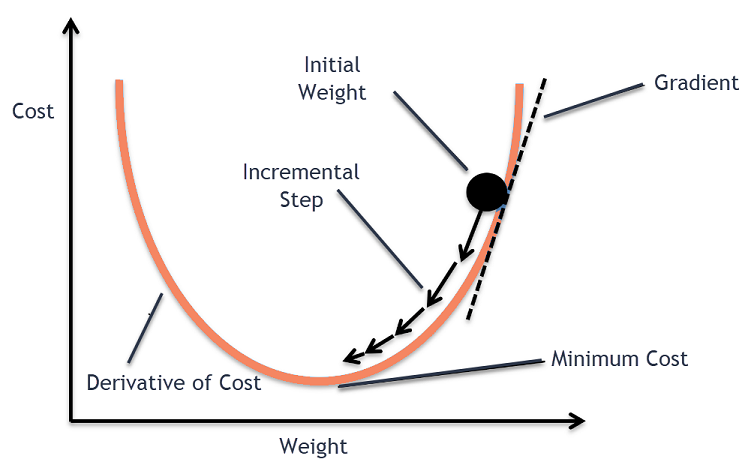

#### Batch Gradient Descent

In Batch Gradient Descent, all the training data is taken into consideration to take a single step. We take the average of the gradients of all the training examples and then use that mean gradient to update our parameters. So that’s just one step of gradient descent in one epoch.

Batch Gradient Descent is great for convex or relatively smooth error manifolds. In this case, we move somewhat directly towards an optimum solution.

#### Stochastic Gradient Descent

In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

the cost will fluctuate over the training examples and it will not necessarily decrease. But in the long run, you will see the cost decreasing with fluctuations.

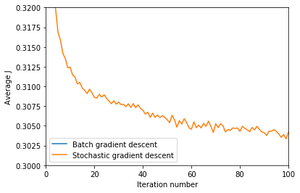

SGD can be used for larger datasets. It converges faster when the dataset is large as it causes updates to the parameters more frequently.

#### Mini Batch Gradient Descent

Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.

* So, when we are using the mini-batch gradient descent we are updating our parameters frequently as well as we can use vectorized implementation for faster computations.